In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
best_model_weight=[None]
best_model_cv_loss=[None]
def norm(input):
    input=input-input.mean(axis=0)
    input=input/input.std(axis=0)
    return input



In [2]:
## we will not do normalization inside this function, please do nomalization outside this functiuon
do_print=False
def my_regression(trainX,testX,noutputs):
    phi=None
    phi=trainX[:,0:trainX.shape[1]-noutputs]

    T=trainX[:,trainX.shape[1]-noutputs:]
    # try different model 
    poly_degree=(1,2,3,4,5,6) # 1 for linear model,2~6 for poly model
    m_lambda=(0,0.0001,0.001,0.01,0.1,1,10,100,1000) # 0 for no regular, 

    # using different method to build the input for different modle
    models_map=dict() # record all the models and cv loss
    for t_poly in poly_degree: # test every poly degree
        #print("degree = %d"%(t_poly))
        phi=trainX[:,0:trainX.shape[1]-noutputs]
        #print("trainX:",trainX)
        #print("phi",phi)
        # build poly input
        poly=PolynomialFeatures(t_poly)
        phi=poly.fit_transform(phi) # the fist column is all one
        min_loss=float("inf")
        for t_lambda in m_lambda: #test every lambda for
            if do_print and t_poly==1 and t_lambda==0:
                print("start cv at linear base function, the weight and loss are showed:")
            #print("lmbda=",t_lambda)
            cv=np.array([])
            for cross_valid in range(5):# cross validation
                total=len(phi)
                start=int(total*cross_valid/5)
                end=int(total*(cross_valid+1)/5)
                if start==end:
                    end=end+1
                test_case=phi[start:end]
                #print("phi",phi)
                train_case=np.append(phi[0:start],phi[end:],axis=0)
                test_T=T[start:end]
                train_T=np.append(T[0:start],T[end:],axis=0)
                #print("train case",train_case)
                #if len(train_case)==1:
                #    W=np.dot(np.linalg.pinv(train_case),train_T)
                #else:
                #    W=np.dot(np.dot(np.linalg.inv( t_lambda * np.eye(train_case.shape[1]) + np.dot(train_case.T,train_case)),train_case.T),train_T)#
                #if t_poly==1 and t_lambda==0 and do_print==True:
                n_col=train_case.shape[1]
                if t_lambda==0:
                    W=np.dot(np.linalg.pinv(train_case),train_T)
                else:
                    W=np.linalg.lstsq(train_case.T.dot(train_case) + t_lambda * np.identity(n_col), train_case.T.dot(train_T),rcond=None)[0]

                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("W=",W)
                #print("train_out=",np.dot(train_case,W))
                test_out=np.dot(test_case,W)
                #print(test_out)
                t_loss=np.average((test_out-test_T)**2)
                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("loss=",t_loss)
                #print("t_loss=",t_loss)
                cv=np.append(cv,t_loss)
            #print(cv)# the cv 
            models_map[(t_poly,t_lambda)]=np.average(cv)
            if np.average(cv)<min_loss:
                min_loss=np.average(cv)
    #print(models_map)
    best_model_cv_loss[0]=min_loss
    min=float("inf")
    min_model=0
    #print(models_map)
    for model in models_map:
        if models_map[model]<min:
            min=models_map[model]
            min_model=model
    if do_print:
        print("the best polynomial degree is %d,and the regularization degree lambda is: %f"%(min_model[0],min_model[1]))
    #print(min_model)
    #print(min)
    t_poly,t_lambda=min_model

    # train the whole trainning set
    phi=trainX[:,0:trainX.shape[1]-noutputs]
        # build poly input
    poly=PolynomialFeatures(t_poly)
    
    phi=poly.fit_transform(phi) # the fist column is all one   
    n_col=phi.shape[1]
    W=np.linalg.lstsq(phi.T.dot(phi) + t_lambda * np.identity(n_col), phi.T.dot(T),rcond=None)[0]
   
    #print(testX)
    best_model_weight[0]=W
    loss=np.average((T-np.dot(phi,W))**2)
    if do_print:
        print(" the best model after cv, the loss is :%f"% loss)
    poly=PolynomialFeatures(t_poly)
    testX=poly.fit_transform(testX) # the fist column is all one   
    #print(testX)
    return np.dot(testX,W)





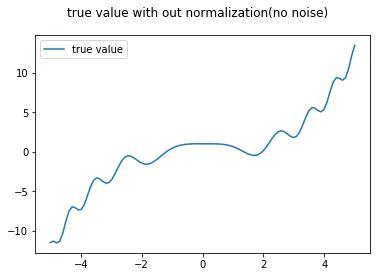

In [3]:

##main:

# question 1:
import matplotlib.pyplot as plt
#trainX=np.array([[1,2,4],[4,21,29],[5,10,20],[2,3,7],[8,100,116],[3,4,10],[9,100,118]])
def fx(x,delta):
    return 0.1*(x**3)+(np.cos(x**2)) + np.random.normal(0,delta)
x=np.linspace(-5.0,5.0,100)
y=np.array([fx(t,0) for t in x])
plt.plot(x,y,label="true value")
plt.suptitle("true value with out normalization(no noise)")
plt.legend()
plt.show()




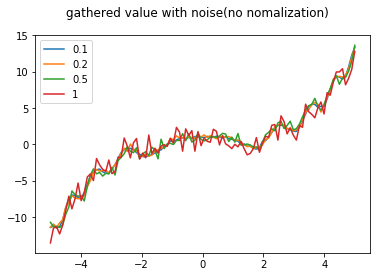

In [4]:
# question 2:

y1=np.array([fx(t,0.1) for t in x])
y2=np.array([fx(t,0.2) for t in x])
y3=np.array([fx(t,0.5) for t in x])
y4=np.array([fx(t,1) for t in x])
plt.clf()
plt.plot(x,y1,label="0.1")
plt.plot(x,y2,label="0.2")
plt.plot(x,y3,label="0.5")
plt.plot(x,y4,label="1")
plt.suptitle("gathered value with noise(no nomalization)")
plt.legend()
plt.show()

start cv at linear base function, the weight and loss are showed:
W= [[0.10424452]
 [0.74598906]]
loss= 0.47030130287006033
W= [[-0.10425622]
 [ 0.98240187]]
loss= 0.2973455305205014
W= [[-0.03931231]
 [ 0.91363582]]
loss= 0.06787347636250725
W= [[0.13206699]
 [0.99905633]]
loss= 0.45594534784113777
W= [[-0.07779396]
 [ 0.78081378]]
loss= 0.3864850057107515
the best polynomial degree is 4,and the regularization degree lambda is: 0.000000
 the best model after cv, the loss is :0.020686


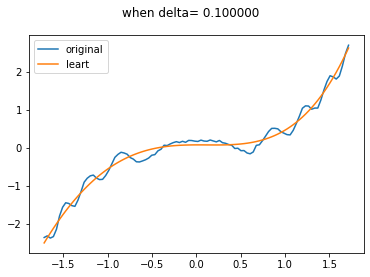

start cv at linear base function, the weight and loss are showed:
W= [[0.10994342]
 [0.73911886]]
loss= 0.4847583589767702
W= [[-0.10640988]
 [ 0.98413971]]
loss= 0.3092151944801138
W= [[-0.04195373]
 [ 0.91457101]]
loss= 0.07587478369292683
W= [[0.13185674]
 [0.99951973]]
loss= 0.45664873290177876
W= [[-0.07430289]
 [ 0.7866602 ]]
loss= 0.3652478393938602
the best polynomial degree is 4,and the regularization degree lambda is: 0.100000
 the best model after cv, the loss is :0.020584


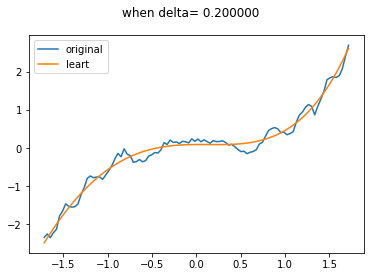

start cv at linear base function, the weight and loss are showed:
W= [[0.1053994 ]
 [0.75431035]]
loss= 0.46666175070018195
W= [[-0.10349947]
 [ 0.98911866]]
loss= 0.2955501173556979
W= [[-0.03646984]
 [ 0.92193157]]
loss= 0.06363852874981543
W= [[0.12116951]
 [0.99979893]]
loss= 0.3942629877144187
W= [[-0.06577026]
 [ 0.80909631]]
loss= 0.29347724453972257
the best polynomial degree is 4,and the regularization degree lambda is: 1.000000
 the best model after cv, the loss is :0.026890


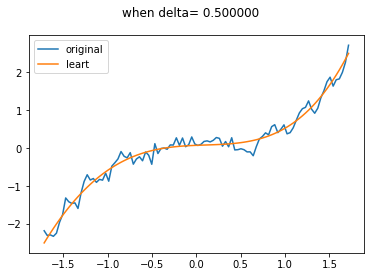

start cv at linear base function, the weight and loss are showed:
W= [[0.11805319]
 [0.68793538]]
loss= 0.6890819063901281
W= [[-0.11717695]
 [ 0.95582715]]
loss= 0.4036515598791651
W= [[-0.03551956]
 [ 0.88255125]]
loss= 0.1288730469090084
W= [[0.12757838]
 [0.96051535]]
loss= 0.4514898070045218
W= [[-0.06570899]
 [ 0.76418226]]
loss= 0.36095240202654055
the best polynomial degree is 3,and the regularization degree lambda is: 1.000000
 the best model after cv, the loss is :0.052857


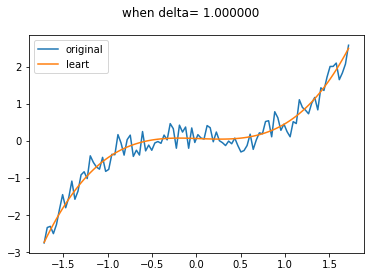

In [5]:
# try to degression
i=0
do_print=True
for y,delta in zip([y1,y2,y3,y4],[0.1,0.2,0.5,1]):
    input=np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    out=my_regression(norm(input),norm(input[:,0:-1]),1)
    plt.clf()
    plt.plot(norm(x.reshape(-1,1)),norm(y.reshape(-1,1)),label="original")
    plt.plot(norm(x.reshape(-1,1)),norm(out),label="leart")
    plt.suptitle("when delta= %f" % delta)
    plt.legend()
    plt.show()


In [6]:
# question 3:

num_of_trainining=[2,5,10,20,50,100,200,500]
div=[0.1,0.2,0.5,1]
loss_dict=dict()
weight_dict=dict()
do_print=False
i=0
j=0
data=np.ndarray([len(num_of_trainining),len(div)],dtype=np.float)
print(data.shape)
for num in num_of_trainining:
    j=0
    for d in div:

        x=np.linspace(-4.8,5.2,num)
        y=[fx(t,d) for t in x ]
        
        trainX=[[t1,t2] for t1,t2 in zip(x,y) ]
        #print(trainX)
        trainX=np.array(trainX)
        trainX=norm(trainX)
        #print(trainX)
        trainOut=my_regression(trainX,trainX[:,0:-1],1)
        loss_dict[(num,d)]=best_model_cv_loss[0]
        weight_dict[(num,d)]=best_model_weight[0]
        data[i,j]=best_model_cv_loss[0]
        j=j+1
    i=i+1
print(data)


(8, 4)
[[1.00198708 1.00198708 1.00198708 1.00198708]
 [0.33987372 0.36186643 0.35153695 0.32961815]
 [0.1597783  0.18695152 0.33716377 0.34370125]
 [0.05101531 0.07069696 0.08547696 0.26657297]
 [0.07211274 0.09580482 0.11055942 0.23110075]
 [0.05421255 0.06361782 0.07252129 0.04726231]
 [0.04928744 0.06907444 0.09499885 0.09826051]
 [0.05177468 0.06013987 0.07170963 0.10001837]]


In [8]:
data=[("./airfoil_self_noise.dat",1),("yacht_hydrodynamics.data",1),("slump_test.data",3)]

for d in data:
    print(d[0])
    inputs=[]
    with open(d[0]) as f:
        for line in iter(f.readline,''):
            inputs.append(line.split())
    inputs=np.array(inputs)
    inputs=inputs.astype(np.float)
    inputs=norm(inputs)
    do_print=True
    testOut=my_regression(inputs,inputs[:,0:-d[1]],d[1])
    pass

./airfoil_self_noise.dat
start cv at linear base function, the weight and loss are showed:
W= [[-0.00357251]
 [-0.56061875]
 [-0.3732828 ]
 [-0.50015885]
 [ 0.23318544]
 [-0.2700562 ]]
loss= 0.19427985160816902
W= [[ 0.00710084]
 [-0.53503233]
 [-0.38797567]
 [-0.50611429]
 [ 0.21921562]
 [-0.26885113]]
loss= 0.42790922103793494
W= [[ 0.02037046]
 [-0.56683433]
 [-0.38570528]
 [-0.48626604]
 [ 0.22285436]
 [-0.23727003]]
loss= 0.486042475931279
W= [[ 0.002538  ]
 [-0.74915552]
 [-0.2050354 ]
 [-0.42741657]
 [ 0.24402027]
 [-0.37551908]]
loss= 1.196669590672469
W= [[-0.03142502]
 [-0.54425513]
 [-0.4162411 ]
 [-0.48449004]
 [ 0.20793312]
 [-0.26097567]]
loss= 0.5555629581920872
the best polynomial degree is 2,and the regularization degree lambda is: 100.000000
 the best model after cv, the loss is :0.368689
yacht_hydrodynamics.data
start cv at linear base function, the weight and loss are showed:
W= [[-4.93516185e-03]
 [ 1.96202876e-02]
 [ 3.27155580e-04]
 [ 1.06241435e-01]
 [-9.8796247